https://www.nengo.ai/nengo/examples.html#introductory-tutorials

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import nengo
from nengo.utils.matplotlib import rasterplot

In [18]:
# create neuron
from nengo.dists import Uniform

model = nengo.Network(label="A Single Neuron")
with model:
    neuron = nengo.Ensemble(
        1,
        dimensions=2,  # Represent a scalar
        # Set non-excited firing rate of neuron = 0.5
        # If there are more neurons, Uniform(a,b) for a ≠ b saves everybody from looking the same
        intercepts=Uniform(-0.5, -0.5),
        # Set maximum firing rate of the neuron: low = high = 100hz
        max_rates=Uniform(100, 100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1,1]],  # Each row is a neuron's encoder; each column is a representational dimension.
        # Range of replicable scalars
        radius=1,
    )

In [19]:
# create input
with model:
    cos = nengo.Node(lambda t: np.cos(8 * t))


In [20]:
# connect input to neuron
with model:
    # Connect the input signal to the neuron
    # nengo.Connection(cos, neuron, synapse=None)  # signal produced by voltage clamp, not synapse

SyntaxError: unexpected EOF while parsing (3805078654.py, line 4)

In [21]:
# set up things to probe
with model:
    # The original input
    # cos_probe = nengo.Probe(cos)
    # The raw spikes from the neuron
    spikes = nengo.Probe(neuron.neurons)
    # Subthreshold soma voltage of the neuron
    voltage = nengo.Probe(neuron.neurons, "voltage")
    # Spikes filtered by a 10ms post-synaptic filter - decoded output
    filtered = nengo.Probe(neuron, synapse=0.01)


In [22]:
# run
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(1)  # Run it for 1 second

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(0.0, 1.0)

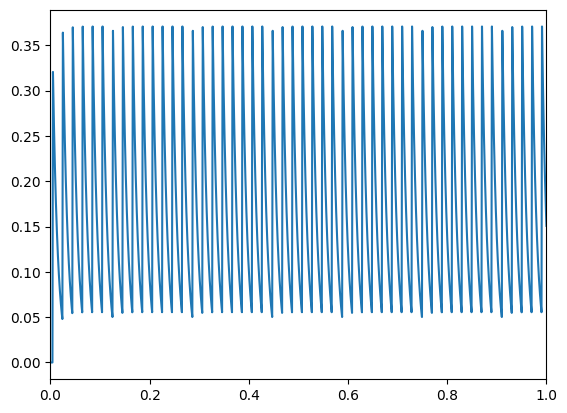

In [27]:
# Plot the decoded output of the ensemble
plt.plot(sim.trange(), sim.data[filtered][:,1])  # Spikes filtered by a 10ms post-synaptic filter
# plt.plot(sim.trange(), sim.data[cos_probe])
# plt.plot(sim.trange(), sim.data[voltage][:, 0], "r")  # soma voltage, in scale set by Ensemble init(intercept)
plt.xlim(0, 1)

(0.0, 1.0)

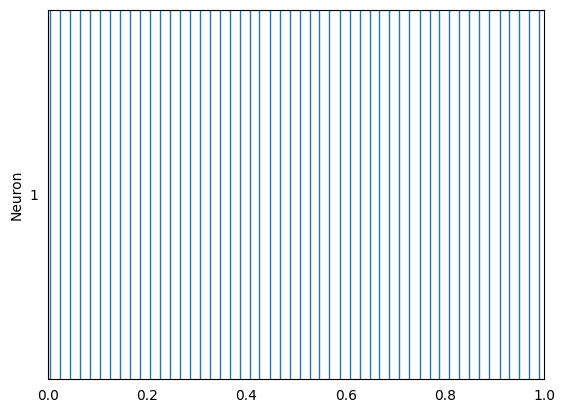

In [24]:
# spike train
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlim(0, 1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

ValueError: x and y can be no greater than 2D, but have shapes (50, 50, 2) and (50, 50, 1)

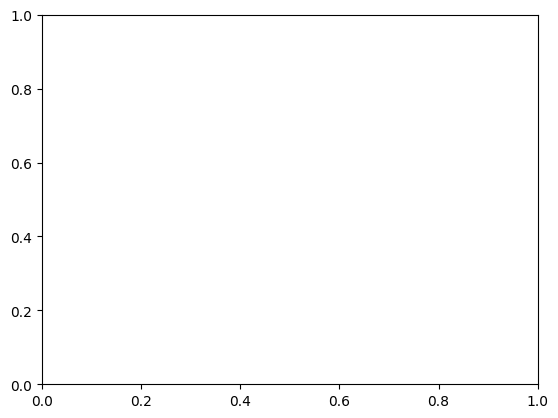

In [28]:
from nengo.utils.ensemble import response_curves, tuning_curves

with nengo.Simulator(model) as sim:
    plt.plot(*tuning_curves(neuron, sim))